# A09 - Resampling

# Ejercicios Conceptuales


## Ejercicio 1
**Pregunta:** Usando las propiedades estadísticas básicas de la varianza, así como cálculo de una variable, derive la ecuación (5.6). En otras palabras, pruebe que $\alpha$ dado por (5.6) minimiza $Var(\alpha X + (1 - \alpha)Y)$.


**Respuesta:**
Partimos de la fórmula de la varianza para la suma de dos variables aleatorias correlacionadas:
$$Var(\alpha X + (1 - \alpha)Y) = \alpha^2 Var(X) + (1 - \alpha)^2 Var(Y) + 2\alpha(1 - \alpha)Cov(X, Y)$$

Notamos $Var(X) = \sigma_X^2$, $Var(Y) = \sigma_Y^2$ y $Cov(X,Y) = \sigma_{XY}$.
$$f(\alpha) = \alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2(\alpha - \alpha^2)\sigma_{XY}$$

Para minimizar, derivamos respecto a $\alpha$ e igualamos a 0:
$$\frac{d}{d\alpha} f(\alpha) = 2\alpha \sigma_X^2 - 2(1 - \alpha) \sigma_Y^2 + 2(1 - 2\alpha)\sigma_{XY} = 0$$

Dividimos entre 2 y reordenamos:
$$\alpha \sigma_X^2 - \sigma_Y^2 + \alpha \sigma_Y^2 + \sigma_{XY} - 2\alpha \sigma_{XY} = 0$$

Agrupamos los términos con $\alpha$:
$$\alpha (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = \sigma_Y^2 - \sigma_{XY}$$

Despejamos $\alpha$:
$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

Con esto se confirma la ecuación (5.6).


## Ejercicio 2
**Pregunta:** Investigaremos la probabilidad de que una observación dada sea parte de una muestra bootstrap.


**(a) ¿Cuál es la probabilidad de que la primera observación bootstrap no sea la j-ésima observación de la muestra original?**
R: Dado que el muestreo es con reemplazo y hay n observaciones, la probabilidad de elegir una específica es $1/n$. Por tanto, la probabilidad de no elegirla es:
$$1 - \frac{1}{n}$$


**(b) ¿Cuál es la probabilidad de que la segunda observación bootstrap no sea la j-ésima observación?**
R: Como es con reemplazo, los eventos son independientes. La probabilidad es la misma:
$$1 - \frac{1}{n}$$

**(c) Argumente que la probabilidad de que la j-ésima observación no esté en la muestra bootstrap es $(1 - 1/n)^n$.**
R: Una muestra bootstrap consiste en n extracciones independientes. Para que la observación j no esté en la muestra, no debe ser seleccionada en la primera extracción, NI en la segunda, ..., NI en la n-ésima. Multiplicando las probabilidades:
$$(1 - \frac{1}{n}) \times (1 - \frac{1}{n}) \times ... \times (1 - \frac{1}{n}) = \left(1 - \frac{1}{n}\right)^n$$


**(d) Cuando n = 5, ¿cuál es la probabilidad de que la j-ésima observación esté en la muestra bootstrap?**
R: La probabilidad de que **esté** es el complemento de que **no esté**:
$$1 - (1 - 1/5)^5 = 1 - (0.8)^5 = 1 - 0.32768 = 0.672$$


**(e) Cuando n = 100...**
R: $$1 - (1 - 1/100)^{100} = 1 - (0.99)^{100} \approx 0.634$$


**(f) Cuando n = 10,000...**
R: $$1 - (1 - 1/10000)^{10000} \approx 0.632$$


**(g) Comentario sobre el gráfico:**
R: A medida que $n$ crece, la probabilidad converge asintóticamente a $1 - 1/e \approx 0.632$.


**(h) Simulación numérica:**
R: El resultado numérico obtenido en el código confirma la teoría, acercándose a 0.632.


## Ejercicio 3
**Pregunta:** Revisión de k-fold cross-validation.

**(a) Explique cómo se implementa k-fold cross-validation.**
R: 
1. Se divide aleatoriamente el conjunto de datos en $k$ grupos (folds) de tamaño aproximadamente igual.
2. Se reserva el primer fold como conjunto de prueba y se entrena el modelo con los $k-1$ folds restantes.
3. Se calcula el error cuadrático medio (MSE) o la tasa de error en el fold de prueba.
4. Se repite el proceso $k$ veces, usando un fold distinto como prueba cada vez.
5. El error final es el promedio de los $k$ errores obtenidos.


**(b) Ventajas y desventajas relativas a:**
* **i. Validation Set Approach:** Ventaja k-fold: Menor varianza en la estimación del error (no depende tanto de una sola partición arbitraria) y usa más datos para entrenar, reduciendo el sesgo.
    * Desventaja: Más costoso computacionalmente.
* **ii. LOOCV:** Ventaja k-fold: Menor costo computacional ($k$ ajustes vs $n$ ajustes). A menudo ofrece estimaciones de error con menor varianza que LOOCV porque los modelos de entrenamiento en LOOCV están muy correlacionados.
    * Desventaja: Tiene ligeramente más sesgo que LOOCV.


## Ejercicio 4
**Pregunta:** Describa cómo estimar la desviación estándar de una predicción usando Bootstrap.

**Respuesta:**
Para estimar la incertidumbre de una predicción $Y$ para un valor $X$:
1. Generamos $B$ muestras bootstrap del conjunto de datos original (muestreo con reemplazo).
2. Para cada muestra bootstrap $b$ (donde $b=1...B$), ajustamos el modelo y realizamos la predicción para el valor $X$ de interés, obteniendo $Y^b$.
3. Calculamos la desviación estándar muestral de las $B$ predicciones obtenidas. Esta desviación estándar es una estimación del error estándar de nuestra predicción.

# Ejercicios Prácticos 

In [25]:
pip install ISLP

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.6 MB ? eta -:--:--
   ----------- ---------------------------- 1.0/3.6 MB 2.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.8/3.6 MB 3.2 MB/s eta 0:00:01
   ----------------------------- ---------- 2.6/3.6 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/849.5 kB ? eta -:--:--
   ---------------------------------------- 849.5/849.5 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/110.9 MB 2.4 MB/s eta 0:00:47
    --------------------------------------- 1.6/110.9 MB 4.0 MB/s eta 0:00:28
    --------------------------------------- 2.4/110.9 MB 3.8 MB/s eta 0:00:29


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from ISLP import load_data

In [3]:
np.random.seed(1)


## Ejercicio 5
**Pregunta:** Regresión logística para predecir 'default' usando 'income' y 'balance'. Estimar error de prueba usando validation set approach.


In [4]:
df_default = pd.read_csv('Default.csv')

In [5]:
df_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


In [7]:
df_default['default01'] = df_default['default'].map({'Yes': 1, 'No': 0})
df_default['student01'] = df_default['student'].map({'Yes': 1, 'No': 0})

X = df_default[['income', 'balance']]
y = df_default['default01']

(a) Ajustar modelo de regresión logística (se hará dentro del paso b para entrenar solo con train)


(b) Validation Set Approach

i. Split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

ii. Fit

In [9]:
clf = LogisticRegression(solver='newton-cg') # Solver similar a R
clf.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

ii. Predict

In [10]:
preds = clf.predict(X_val)

iv. Compute error

In [11]:
error_rate = 1 - accuracy_score(y_val, preds)
print(f"Tasa de error (Validation Set): {error_rate:.4f}")

Tasa de error (Validation Set): 0.0258


(c) Repetir el proceso 3 veces con distintas semillas

In [12]:
for seed in [1, 2, 3]:
    X_tr, X_v, y_tr, y_v = train_test_split(X, y, test_size=0.5, random_state=seed)
    clf.fit(X_tr, y_tr)
    err = 1 - accuracy_score(y_v, clf.predict(X_v))
    print(f"Split seed {seed} - Error: {err:.4f}")


Split seed 1 - Error: 0.0248
Split seed 2 - Error: 0.0248
Split seed 3 - Error: 0.0250


(d) Incluir variable dummy 'student'

In [14]:
X_student = df_default[['income', 'balance', 'student01']]
X_tr, X_v, y_tr, y_v = train_test_split(X_student, y, test_size=0.5, random_state=42)
clf.fit(X_tr, y_tr)
err_student = 1 - accuracy_score(y_v, clf.predict(X_v))
print(f"Error con student: {err_student:.4f}")

Error con student: 0.0256


Incluir 'student' no reduce significativamente el error

## Ejercicio 6
**Pregunta:** Estimar errores estándar de los coeficientes usando (1) Bootstrap y (2) fórmulas estándar de glm().

(a) Usando summary() de statsmodels (equivalente a glm() en R)

In [15]:
X_sm = sm.add_constant(df_default[['income', 'balance']])
y_sm = df_default['default01']
model_sm = sm.Logit(y_sm, X_sm).fit(disp=0)
print("Errores Estándar (Statsmodels):")
print(model_sm.bse)

Errores Estándar (Statsmodels):
const      0.434772
income     0.000005
balance    0.000227
dtype: float64


(b) y (c) Función Bootstrap y ejecución

In [16]:
coefs_boot = []
n_iterations = 1000

In [18]:
for i in range(n_iterations):
    
    df_boot = resample(df_default)
    X_b = df_boot[['income', 'balance']]
    y_b = df_boot['default01']
    clf_boot = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    clf_boot.fit(X_b, y_b)
    
    coefs_boot.append([clf_boot.intercept_[0], clf_boot.coef_[0][0], clf_boot.coef_[0][1]])


In [19]:
coefs_boot = np.array(coefs_boot)
se_boot = np.std(coefs_boot, axis=0)

In [20]:
print(f"Intercept SE: {se_boot[0]:.6f}")
print(f"Income SE:    {se_boot[1]:.6f}")
print(f"Balance SE:   {se_boot[2]:.6f}")

Intercept SE: 0.446721
Income SE:    0.000005
Balance SE:   0.000231


Los errores estándar son muy parecidos entre los métodos

## Ejercicio 7
**Pregunta:** Calcular error LOOCV para regresión logística en dataset 'Weekly' usando un loop `for`.

In [29]:
df_weekly = load_data('Weekly')
df_weekly['Direction01'] = df_weekly['Direction'].map({'Up': 1, 'Down': 0})
X_wk = df_weekly[['Lag1', 'Lag2']] 
X_wk_sm = sm.add_constant(X_wk)  
y_wk = df_weekly['Direction01']

(a) Ajuste con todos los datos

In [30]:
model_full = sm.Logit(y_wk, X_wk_sm).fit(disp=0)
print(f"Modelo completo ajustado. Params:\n{model_full.params}")

Modelo completo ajustado. Params:
const    0.221224
Lag1    -0.038722
Lag2     0.060248
dtype: float64


(b) Ajuste sin la primera observación

In [32]:
model_no1 = sm.Logit(y_wk.iloc[1:], X_wk_sm.iloc[1:]).fit(disp=0)

(c) Predecir la primera observación

In [33]:
prob_1 = model_no1.predict(X_wk_sm.iloc[0:1])
pred_1 = 1 if prob_1.values[0] > 0.5 else 0
is_correct = (pred_1 == y_wk.iloc[0])
print(f"Obs 1 predicha correctamente: {is_correct}")


Obs 1 predicha correctamente: False


(d) Loop LOOCV

In [34]:
errors = []
n = len(df_weekly)

In [35]:
clf_wk = LogisticRegression(penalty=None, solver='lbfgs')

In [36]:
for i in range(n):
    # i. Fit usando todo menos i
    X_train = X_wk.drop(index=i)
    y_train = y_wk.drop(index=i)
    X_test = X_wk.iloc[[i]]
    y_test = y_wk.iloc[[i]]
    
    clf_wk.fit(X_train, y_train)
    
    # ii, iii. Predecir
    pred = clf_wk.predict(X_test)[0]
    
    # iv. Determinar error
    if pred != y_test.values[0]:
        errors.append(1)
    else:
        errors.append(0)


(e) Promedio

In [37]:
loocv_error = np.mean(errors)
print(f"LOOCV Error Rate: {loocv_error:.4f}")

LOOCV Error Rate: 0.4500


## Ejercicio 8
 **Pregunta:** Cross-validation en datos simulados.

(a) Generar datos

In [38]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)
df_sim = pd.DataFrame({'x': x, 'y': y})

(b) Scatterplot

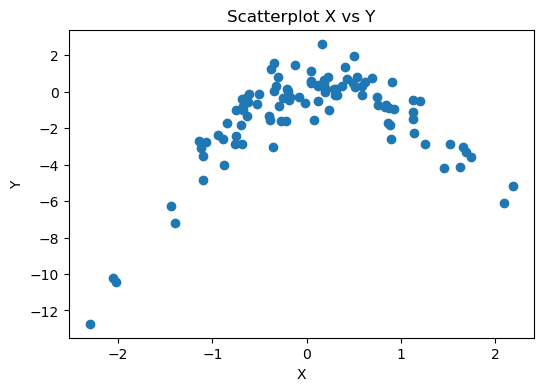

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.title("Scatterplot X vs Y")
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

(c) LOOCV para polinomios grado 1 a 4

In [40]:
loo = LeaveOneOut()
for d in [1, 2, 3, 4]:
    poly_model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    # scoring='neg_mean_squared_error' devuelve negativo, multiplicamos por -1
    scores = cross_val_score(poly_model, df_sim[['x']], df_sim['y'], cv=loo, scoring='neg_mean_squared_error')
    mse = -np.mean(scores)
    print(f"Grado {d}: {mse:.4f}")

Grado 1: 6.2608
Grado 2: 0.9143
Grado 3: 0.9269
Grado 4: 0.8669


(d) Repetir con otra semilla

En LOOCV la semilla no afecta porque el proceso es 100% mecánico y sin azar: en lugar de revolver los datos para hacer equipos aleatorios, el modelo toma cada dato uno por uno para probarlo hasta acabar con todos. Como siempre recorre la lista completa exactamente igual, el resultado es idéntico sin importar qué número que elijas.

(f) Significancia estadística (usando statsmodels para ver p-values)

In [42]:
df_sim['x2'] = df_sim['x']**2
df_sim['x3'] = df_sim['x']**3
df_sim['x4'] = df_sim['x']**4
model_poly = sm.OLS(df_sim['y'], sm.add_constant(df_sim[['x', 'x2', 'x3', 'x4']])).fit()
print(model_poly.pvalues)

const    2.300595e-02
x        2.628698e-06
x2       4.506424e-17
x3       1.231439e-01
x4       1.667664e-02
dtype: float64


Solo x y x^2 deberían ser significativos, coincidiendo con el menor error en Grado 2

## Ejercicio 9
**Pregunta:** Estimación de errores estándar usando Bootstrap en el dataset 'Boston'

In [43]:
df_boston = load_data('Boston')
medv = df_boston['medv']

(a) Estimación de la media

In [48]:
mu_hat = medv.mean()
print(f"Media estimada: {mu_hat:.4f}")


Media estimada: 22.5328


(b) Error estándar de la media (fórmula)

In [49]:
se_hat = medv.std() / np.sqrt(len(medv))
print(f"SE (fórmula): {se_hat:.4f}")

SE (fórmula): 0.4089


(c) Error estándar usando Bootstrap

In [51]:
B = 1000
boot_means = [resample(medv).mean() for _ in range(B)]
se_boot = np.std(boot_means)
print(f"SE (Bootstrap): {se_boot:.4f}")


SE (Bootstrap): 0.3974


(d) Intervalo de confianza 95%

In [52]:
ci_lower = mu_hat - 2*se_boot
ci_upper = mu_hat + 2*se_boot
print(f" 95% CI Bootstrap: [{ci_lower:.4f}, {ci_upper:.4f}]")

 95% CI Bootstrap: [21.7380, 23.3276]


(e) Estimación de la mediana

In [53]:
med_hat = medv.median()
print(f"Mediana estimada: {med_hat:.4f}")


Mediana estimada: 21.2000


(f) SE de la mediana (Bootstrap)

In [54]:
boot_meds = [resample(medv).median() for _ in range(B)]
se_med_boot = np.std(boot_meds)
print(f"SE Mediana (Bootstrap): {se_med_boot:.4f}")

SE Mediana (Bootstrap): 0.3781


(g) Estimación del percentil 10

In [56]:
p10_hat = np.percentile(medv, 10)
print(f"Percentil 10 estimado: {p10_hat:.4f}")

Percentil 10 estimado: 12.7500


(h) SE del percentil 10 (Bootstrap)

In [57]:
boot_p10s = [np.percentile(resample(medv), 10) for _ in range(B)]
se_p10_boot = np.std(boot_p10s)
print(f"SE Percentil 10 (Bootstrap): {se_p10_boot:.4f}")

SE Percentil 10 (Bootstrap): 0.4986
